In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings("ignore")

df = pd.read_csv("./income_cleaned.csv")

In [2]:
df.shape

(32537, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  fiftyplus       32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [6]:
df['age'].dtype

dtype('int64')

In [7]:
#fetching categorical/string columns only...
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']
# fetching numeric columns list
numeric_features = [feature for feature in df.columns if df[feature].dtype =='int64'] 

<Figure size 1000x1000 with 0 Axes>

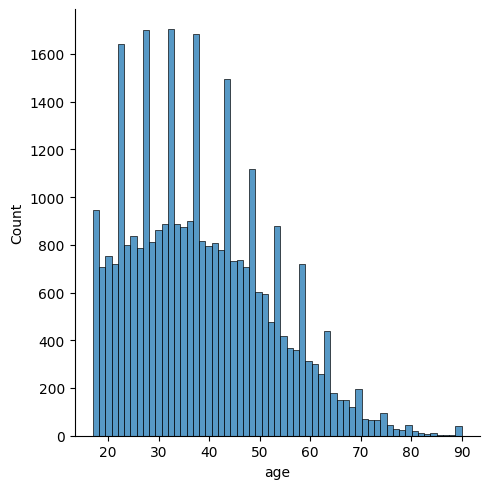

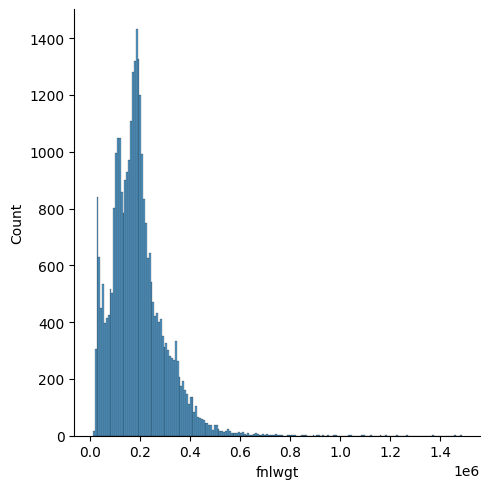

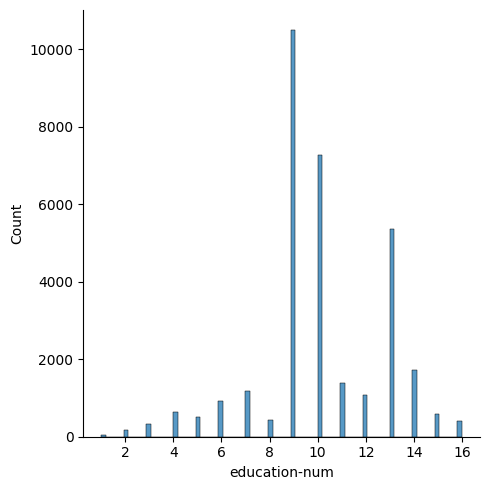

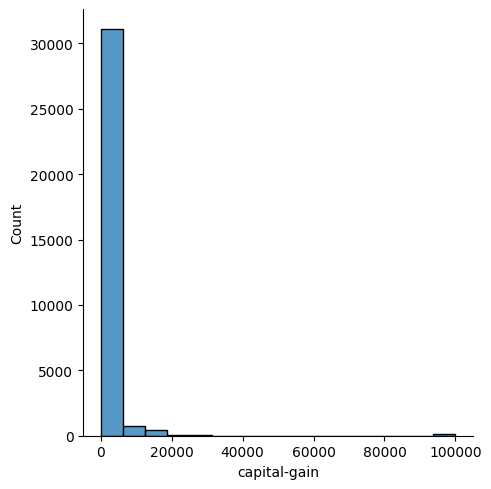

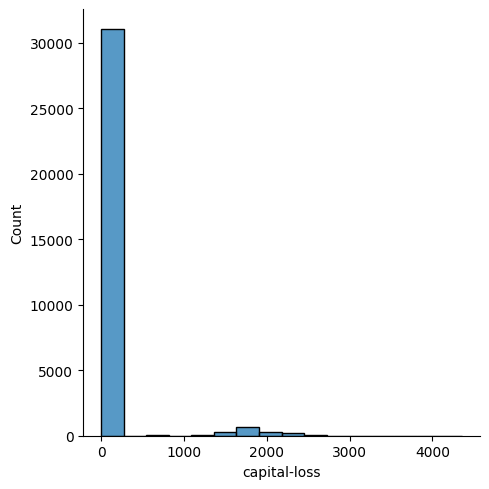

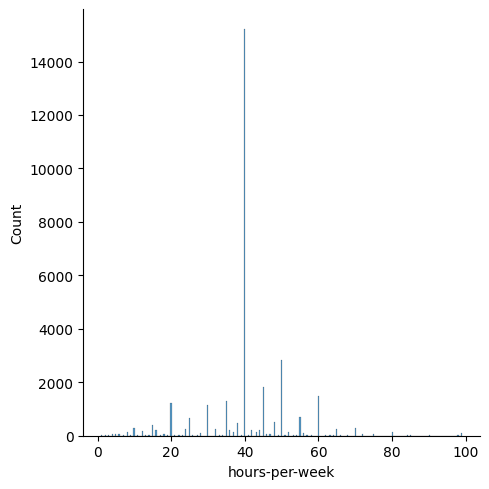

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x=0

for i in numeric_features:
    sns.displot(df[i])
    print('\n')
    plt.show()
    

In [9]:
df['fiftyplus'].value_counts(normalize=True) * 100 # getting how many percentage values in type columns....

fiftyplus
<=50K    75.907428
>50K     24.092572
Name: proportion, dtype: float64

[Text(0, 0, '24698'), Text(0, 0, '7839')]

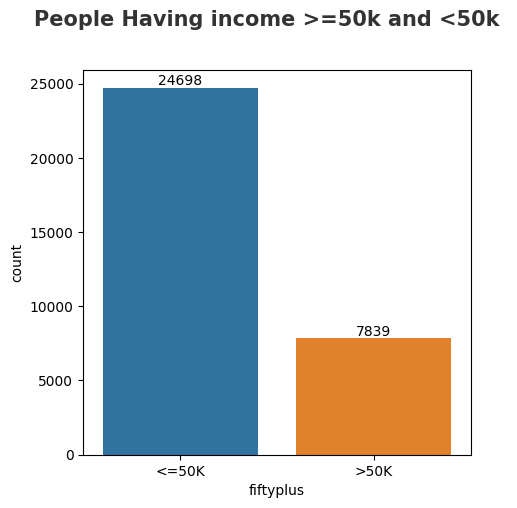

In [10]:
#number of people with income ratio
plt.figure(figsize=(5, 5))
plt.suptitle('People Having income >=50k and <50k ', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
gr = sns.countplot(x = df['fiftyplus'])

abs_values = df['fiftyplus'].value_counts(ascending=False).values

gr.bar_label(container=gr.containers[0], labels=abs_values)


[Text(0, 0, '21775'), Text(0, 0, '10762')]

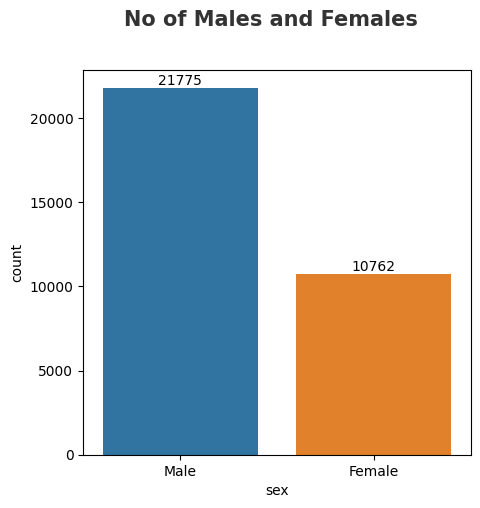

In [11]:
#number of people with income ratio
plt.figure(figsize=(5, 5))
plt.suptitle('No of Males and Females', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
gr = sns.countplot(x = df['sex'])
abs_values = df['sex'].value_counts(ascending=False).values
gr.bar_label(container=gr.containers[0], labels=abs_values)

[Text(0, 0, '22673'),
 Text(0, 0, '2540'),
 Text(0, 0, '2093'),
 Text(0, 0, '1836'),
 Text(0, 0, '1298'),
 Text(0, 0, '1116'),
 Text(0, 0, '960'),
 Text(0, 0, '14'),
 Text(0, 0, '7')]

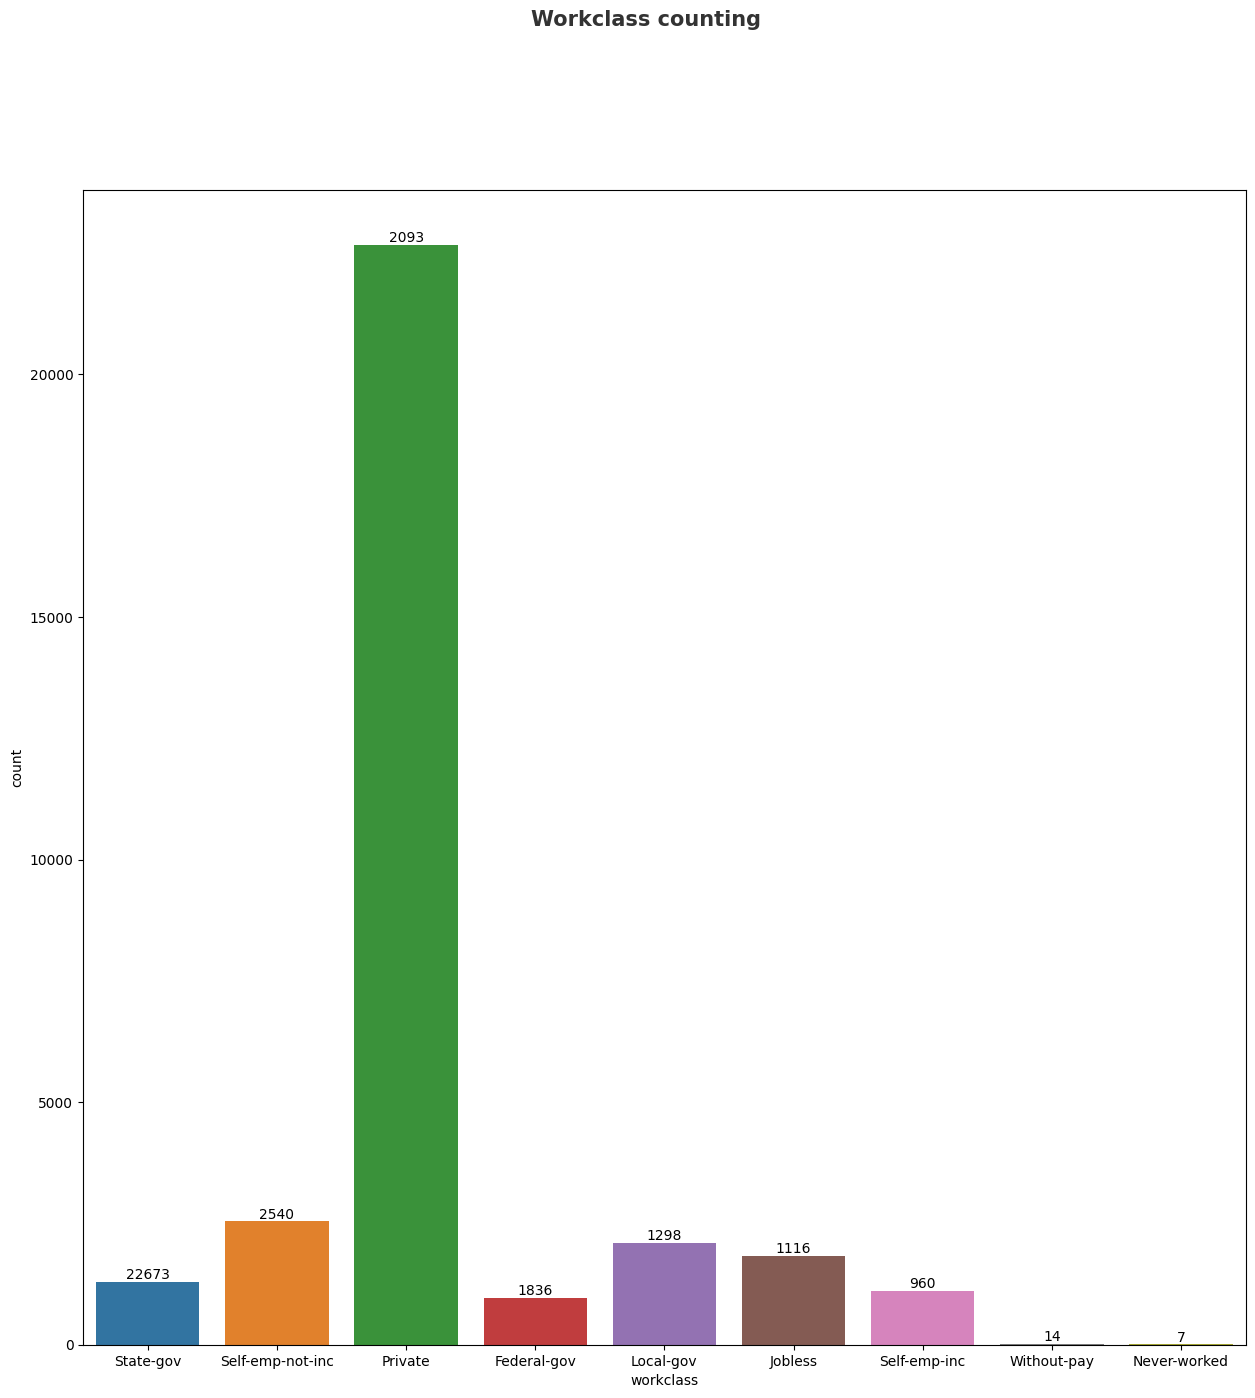

In [12]:
#number of people with workclass ratio
# number of people working in different workclass with jobless numbers also 
plt.figure(figsize=(15, 15))
plt.suptitle('Workclass counting', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
gr = sns.countplot(x = df['workclass'])
abs_values = df['workclass'].value_counts(ascending=False).values
gr.bar_label(container=gr.containers[0], labels=abs_values)

<Axes: xlabel='capital-gain', ylabel='Density'>

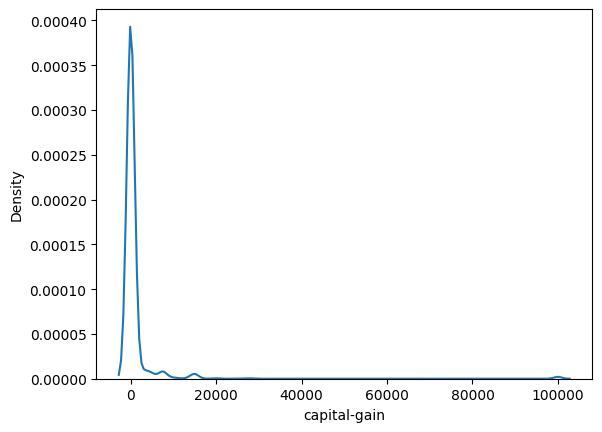

In [13]:
sns.kdeplot(df['capital-gain']) # right skewed...

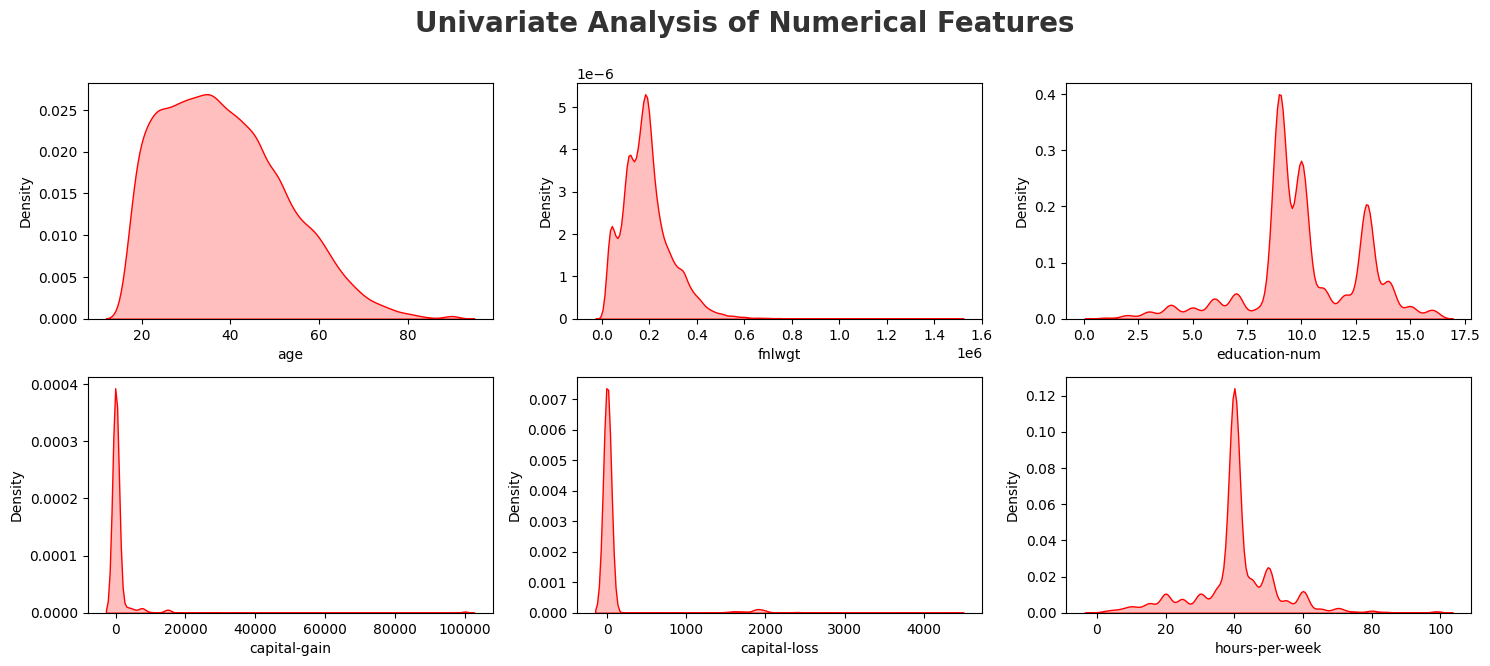

In [14]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<Axes: ylabel='count'>

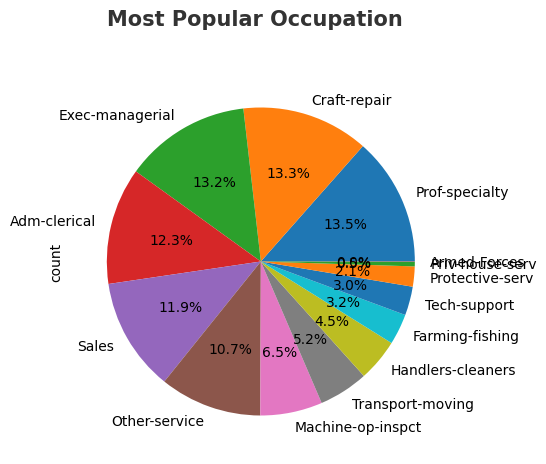

In [15]:
plt.suptitle('Most Popular Occupation', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
df['occupation'].value_counts().plot.pie(figsize=(5,5),autopct='%1.1f%%') # most popular occupation...

<Axes: ylabel='count'>

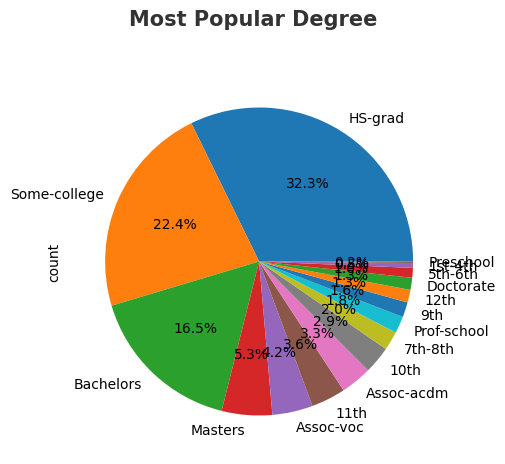

In [16]:
plt.suptitle('Most Popular Degree', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
df['education'].value_counts().plot.pie(figsize=(5,5),autopct='%1.1f%%') # most education degree...

In [22]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


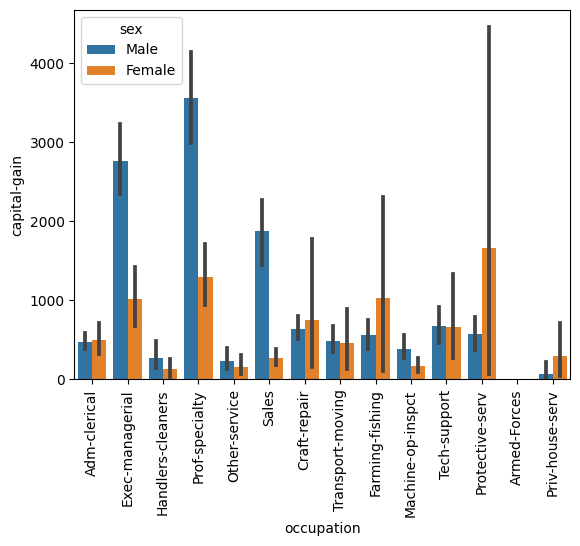

In [28]:
# relationship between occupation-wise capital-gain...
plt.Figure(figsize=(90,90))
plt.xticks(rotation=90)
sns.barplot(data=df, x="occupation", y="capital-gain", hue="sex")
# sns.barplot('occupation','capital-gain',data=df, ci = None)
plt.show()

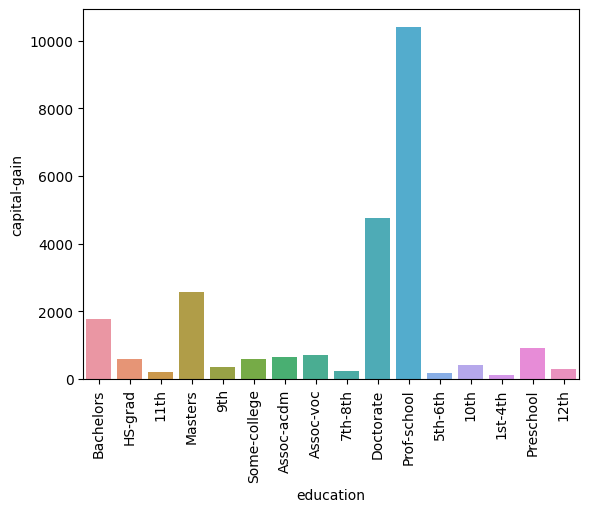

In [33]:
# relationship between education-wise and capital-gain...
plt.Figure(figsize=(90,90))
plt.xticks(rotation=90)
sns.barplot(x='education',y='capital-gain',data=df, ci=None)
plt.show()

<Axes: xlabel='capital-gain', ylabel='Density'>

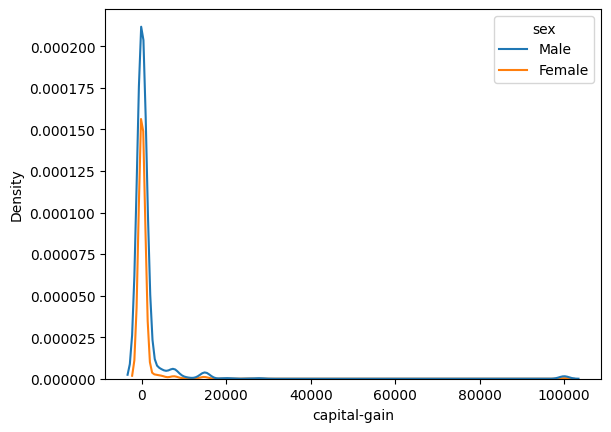

In [34]:
# comparison of capital gain between gender
sns.kdeplot(x='capital-gain', data=df, hue='sex')

<Axes: title={'center': 'Gender wise income'}, xlabel='fiftyplus,sex'>

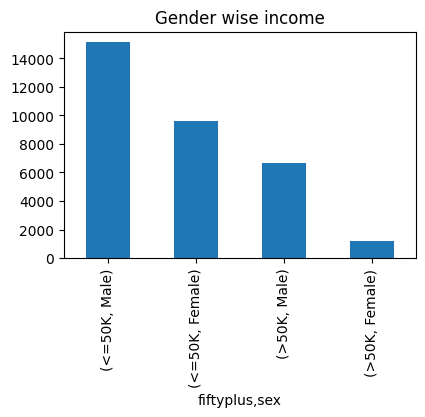

In [35]:
# Set up a grid of plots
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)
# Plot accidents depending on type
plt.subplot2grid(fig_dims, (0, 0))
df.groupby('fiftyplus')['sex'].value_counts().plot(kind='bar', 
                                     title='Gender wise income')

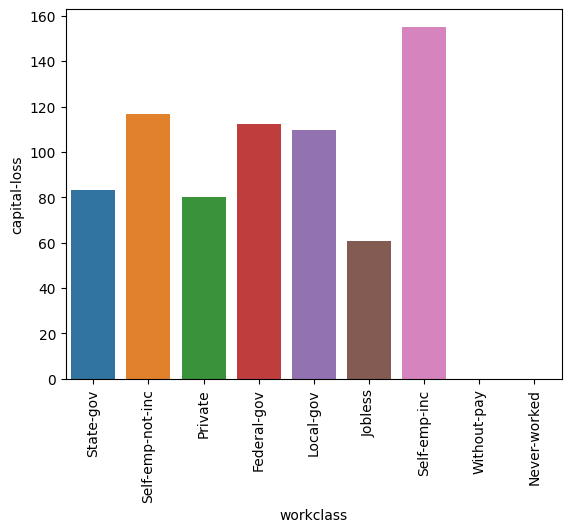

In [37]:
# relationship between workclass capital-loss...
plt.Figure(figsize=(90,90))
plt.xticks(rotation=90)
sns.barplot(x='workclass',y='capital-loss',data=df, ci = None)
plt.show()

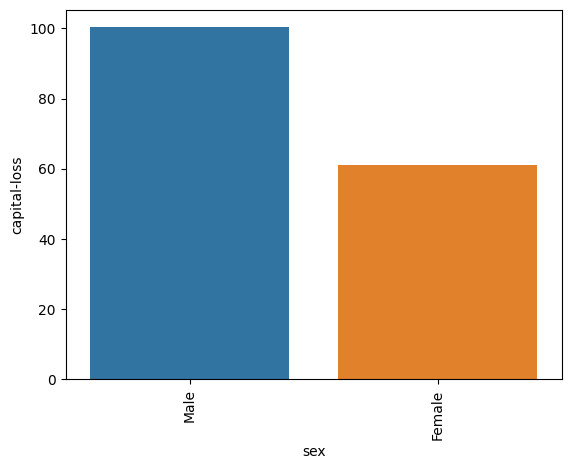

In [39]:
# relationship between workclass capital-loss...
plt.Figure(figsize=(90,90))
plt.xticks(rotation=90)
sns.barplot(x='sex',y='capital-loss',data=df, ci = None)
plt.show()

In [40]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

<Axes: title={'center': 'Race wise income'}, xlabel='race,fiftyplus'>

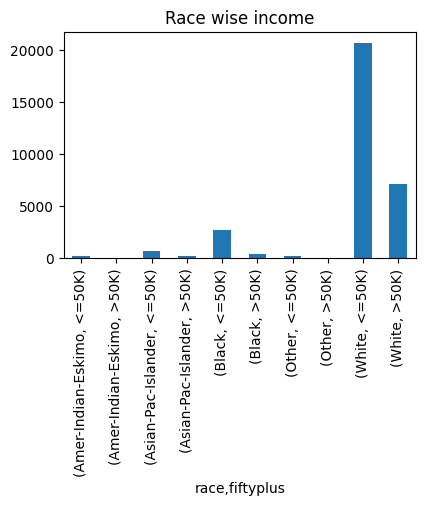

In [41]:
# does race wise income of the people..
# Set up a grid of plots
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)
# Plot accidents depending on type
plt.subplot2grid(fig_dims, (0, 0))
df.groupby('race')['fiftyplus'].value_counts().plot(kind='bar', 
                                     title='Race wise income')

In [42]:
#finding total capital-loss by gender-wise- who is losing more male/female 
gr = df.groupby('sex')['capital-loss'].sum().sort_values(ascending=False).T
gr


sex
Male      2183648
Female     659052
Name: capital-loss, dtype: int64

In [43]:
#top 5 capital loss by gender group

groupedDF = df.groupby(['sex','capital-loss'],sort=False).sum()
sortedDF = groupedDF.sort_values('capital-loss', ascending=False)

sortedDF[:5]

age              workclass  fnlwgt   
sex    capital-loss                                       
Female 4356          238  JoblessPrivateJobless  395984  \
       3900           95         PrivatePrivate  405022   
Male   3770           38                Private  150601   
Female 3770           34                Private  216864   
       3683          142   State-govFederal-gov  510651   

                                      education  education-num   
sex    capital-loss                                              
Female 4356          HS-gradHS-gradSome-college             28  \
       3900                 7th-8thSome-college             14   
Male   3770                                10th              6   
Female 3770                             HS-grad              9   
       3683                    DoctorateHS-grad             25   

                            marital-status                       occupation   
sex    capital-loss                                                           
Female 4356          WidowedWidowedWidowed                  Exec-managerial  \
       3900              DivorcedSeparated  Machine-op-inspctProf-specialty   
Male   3770                      Separated                     Adm-clerical   
Female 3770                       Divorced                    Other-service   
       3683          Never-marriedDivorced     Prof-specialtyProf-specialty   

                                            relationship             race   
sex    capital-loss                                                         
Female 4356          Not-in-familyNot-in-familyUnmarried  WhiteWhiteBlack  \
       3900                           UnmarriedOwn-child       WhiteWhite   
Male   3770                                    Unmarried            White   
Female 3770                                    Unmarried            White   
       3683                  Other-relativeNot-in-family       WhiteWhite   

                     capital-gain  hours-per-week   
sex    capital-loss                                 
Female 4356                     0              98  \
       3900                     0              80   
Male   3770                     0              40   
Female 3770                     0              45   
       3683                     0              60   

                                              native-country        fiftyplus  
sex    capital-loss                                                            
Female 4356          United-StatesUnited-StatesUnited-States  <=50K<=50K<=50K  
       3900                       United-StatesUnited-States       <=50K<=50K  
Male   3770                                    United-States            <=50K  
Female 3770                                    United-States            <=50K  
       3683                       United-StatesUnited-States        >50K<=50K

In [44]:
# top 5 capital-gain by male's records..
gr = df.groupby(['sex'])
malegroup = gr.get_group('Male').sort_values('capital-gain', ascending=False)
malegroup[0:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
10845,32,Private,330715,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
17782,42,Self-emp-not-inc,201908,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,50,United-States,>50K
12089,24,Jobless,151153,Some-college,10,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Male,99999,0,50,South,>50K
31089,22,Self-emp-not-inc,214014,Some-college,10,Never-married,Sales,Own-child,Black,Male,99999,0,55,United-States,>50K
9225,46,Private,273771,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K


In [45]:
# top 5 capital-gain by male's records..
gr = df.groupby(['sex'])
femalegroup = gr.get_group('Female').sort_values('capital-gain', ascending=False)
femalegroup[0:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
22796,33,Private,134886,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,99999,0,30,United-States,>50K
4656,37,Local-gov,287306,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Wife,Black,Female,99999,0,40,United-States,>50K
6000,51,Private,44000,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,99999,0,50,United-States,>50K
1826,22,Self-emp-not-inc,202920,HS-grad,9,Never-married,Prof-specialty,Unmarried,White,Female,99999,0,40,Dominican-Republic,>50K
19075,52,Self-emp-not-inc,140985,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,99999,0,30,United-States,>50K


In [48]:
male5 = malegroup[0:5]
male5 = male5[['capital-gain','hours-per-week']]
male5


,capital-gain,hours-per-week
10845,99999,40
17782,99999,50
12089,99999,50
31089,99999,55
9225,99999,40


In [47]:
female5 = femalegroup[0:5]
female5 = female5[['capital-gain','hours-per-week']]
female5


,capital-gain,hours-per-week
22796,99999,30
4656,99999,40
6000,99999,50
1826,99999,40
19075,99999,30


In [49]:
# list of people who are from US and having morethan 50k income..
df[((df['native-country']=='United-States') & (df['fiftyplus']=='>50K'))]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32515,71,Jobless,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32521,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32530,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [50]:
## average age
print(df.groupby(["fiftyplus"]).mean())

TypeError: Could not convert State-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateFederal-govState-govPrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateFederal-govSelf-emp-not-incPrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivateSelf-emp-incPrivatePrivateFederal-govState-govPrivateLocal-govPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivateLocal-govPrivateFederal-govPrivatePrivateSelf-emp-not-incPrivateJoblessLocal-govState-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateState-govState-govPrivateSelf-emp-not-incState-govJoblessPrivatePrivatePrivatePrivatePrivateLocal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incJoblessSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incJoblessJoblessPrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateFederal-govPrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivateState-govPrivatePrivateLocal-govState-govPrivatePrivatePrivatePrivatePrivateFederal-govPrivateLocal-govJoblessJoblessSelf-emp-not-incPrivateLocal-govLocal-govPrivateLocal-govPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incState-govPrivateJoblessPrivateJoblessLocal-govLocal-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateJoblessPrivatePrivateJoblessPrivateJoblessJoblessLocal-govPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incLocal-govSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incJoblessJoblessPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incLocal-govSelf-emp-not-incPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateLocal-govPrivateJoblessPrivatePrivateState-govPrivateState-govJoblessPrivatePrivatePrivatePrivateLocal-govPrivateState-govJoblessPrivateFederal-govJoblessSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govLocal-govState-govPrivateJoblessLocal-govPrivatePrivateLocal-govPrivatePrivatePrivateState-govJoblessPrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivateLocal-govPrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateJoblessJoblessSelf-emp-incJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incJoblessPrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-incSelf-emp-not-incPrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateState-govPrivatePrivateJoblessJoblessSelf-emp-incPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivateJoblessSelf-emp-incPrivateLocal-govPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govState-govPrivatePrivatePrivateFederal-govSelf-emp-not-incPrivatePrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivatePrivateFederal-govPrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivateJoblessPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateJoblessFederal-govPrivateState-govLocal-govPrivatePrivatePrivatePrivateLocal-govLocal-govPrivatePrivatePrivatePrivatePrivateLocal-govJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incFederal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateState-govLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govSelf-emp-not-incPrivatePrivateState-govPrivateJoblessPrivateSelf-emp-incPrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateFederal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateFederal-govPrivateJoblessPrivatePrivateJoblessLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govState-govPrivatePrivateState-govPrivatePrivateJoblessJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-incPrivateFederal-govPrivatePrivateJoblessPrivateSelf-emp-incLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivateFederal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-incSelf-emp-not-incState-govPrivatePrivateJoblessPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateJoblessState-govSelf-emp-incPrivateSelf-emp-not-incSelf-emp-incJoblessPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivateFederal-govPrivatePrivatePrivatePrivateLocal-govState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateState-govPrivatePrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govLocal-govState-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateLocal-govLocal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateLocal-govJoblessJoblessPrivatePrivateJoblessPrivateSelf-emp-not-incState-govLocal-govJoblessPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govJoblessSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivateState-govState-govState-govPrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incLocal-govJoblessPrivatePrivateSelf-emp-not-incLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateJoblessPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incJoblessPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govJoblessPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateLocal-govSelf-emp-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivateState-govPrivateLocal-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateFederal-govJoblessPrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incLocal-govState-govPrivatePrivatePrivatePrivatePrivateJoblessPrivateFederal-govPrivatePrivatePrivateState-govPrivateSelf-emp-not-incJoblessPrivatePrivateFederal-govLocal-govPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateWithout-payPrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-incPrivateSelf-emp-not-incPrivateLocal-govLocal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivateLocal-govLocal-govPrivateState-govState-govSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateLocal-govLocal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incState-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateFederal-govPrivateLocal-govPrivatePrivatePrivatePrivateJoblessPrivateFederal-govState-govPrivatePrivatePrivatePrivateJoblessPrivateState-govPrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessFederal-govPrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivateJoblessPrivateJoblessPrivateJoblessPrivateLocal-govSelf-emp-not-incPrivatePrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivateState-govPrivateLocal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateState-govState-govLocal-govPrivatePrivatePrivatePrivatePrivateFederal-govPrivateLocal-govPrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivatePrivateJoblessPrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivateLocal-govPrivatePrivateSelf-emp-not-incLocal-govJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govJoblessPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-not-incLocal-govPrivatePrivateState-govFederal-govPrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govState-govJoblessLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateState-govPrivateLocal-govPrivatePrivatePrivateSelf-emp-incPrivatePrivateJoblessPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateFederal-govPrivatePrivateJoblessPrivateJoblessJoblessJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govLocal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateJoblessPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivateJoblessPrivateSelf-emp-not-incPrivatePrivateLocal-govState-govState-govPrivateSelf-emp-incSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivateLocal-govSelf-emp-not-incSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivateSelf-emp-incPrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govPrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govState-govPrivatePrivatePrivateFederal-govPrivatePrivateJoblessState-govSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivateFederal-govState-govPrivatePrivateJoblessPrivateState-govPrivatePrivateState-govPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govJoblessJoblessState-govState-govPrivateSelf-emp-not-incLocal-govSelf-emp-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivateLocal-govLocal-govFederal-govPrivatePrivateJoblessPrivateSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incState-govSelf-emp-not-incPrivateFederal-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateState-govPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivateJoblessJoblessFederal-govPrivatePrivatePrivatePrivateLocal-govFederal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateLocal-govPrivatePrivateState-govPrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govState-govPrivateJoblessPrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivateJoblessJoblessJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateSelf-emp-not-incSelf-emp-not-incState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessFederal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incJoblessPrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govLocal-govPrivatePrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivateSelf-emp-incPrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateState-govPrivateSelf-emp-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-incSelf-emp-not-incState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivateJoblessPrivateLocal-govPrivateLocal-govState-govJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateState-govPrivateSelf-emp-incPrivatePrivateSelf-emp-not-incPrivateLocal-govJoblessPrivateSelf-emp-not-incLocal-govJoblessLocal-govState-govPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateSelf-emp-incPrivatePrivateJoblessPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incFederal-govPrivatePrivateLocal-govPrivateJoblessPrivatePrivateSelf-emp-incPrivateState-govPrivateLocal-govLocal-govPrivatePrivatePrivatePrivateState-govSelf-emp-not-incState-govPrivateLocal-govPrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessFederal-govPrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateLocal-govPrivateJoblessPrivateJoblessSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-incState-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incState-govPrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govFederal-govPrivateSelf-emp-not-incJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessSelf-emp-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivateState-govJoblessLocal-govPrivateJoblessPrivatePrivateJoblessPrivatePrivateSelf-emp-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateState-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateFederal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivateJoblessSelf-emp-not-incPrivateLocal-govSelf-emp-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessJoblessPrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivateJoblessLocal-govPrivatePrivateJoblessSelf-emp-not-incPrivateJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivateJoblessPrivateLocal-govPrivateFederal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivateLocal-govLocal-govPrivatePrivateState-govPrivatePrivateJoblessJoblessFederal-govPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateFederal-govPrivateFederal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateJoblessPrivateLocal-govLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incLocal-govPrivatePrivateFederal-govJoblessSelf-emp-incPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govJoblessSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateSelf-emp-not-incPrivateSelf-emp-not-incFederal-govPrivateFederal-govState-govJoblessLocal-govPrivateJoblessJoblessPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateLocal-govPrivateJoblessPrivatePrivatePrivateJoblessPrivateJoblessJoblessFederal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivateJoblessState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessState-govPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivateJoblessSelf-emp-incPrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivateState-govFederal-govLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivateJoblessPrivateLocal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateSelf-emp-not-incPrivateState-govPrivateState-govPrivatePrivateJoblessSelf-emp-not-incPrivateState-govState-govJoblessSelf-emp-incJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateState-govPrivatePrivateLocal-govPrivateSelf-emp-not-incLocal-govPrivateJoblessSelf-emp-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incFederal-govPrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateLocal-govPrivateLocal-govPrivateSelf-emp-not-incPrivatePrivateState-govSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incFederal-govPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govJoblessPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-incLocal-govPrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivateFederal-govPrivatePrivatePrivateFederal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivateSelf-emp-incPrivateSelf-emp-incPrivatePrivateSelf-emp-not-incState-govState-govSelf-emp-not-incState-govJoblessPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateFederal-govFederal-govPrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govJoblessPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateJoblessState-govPrivateJoblessPrivatePrivatePrivateState-govPrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incState-govPrivatePrivatePrivatePrivateJoblessJoblessPrivateLocal-govPrivatePrivateJoblessSelf-emp-not-incPrivatePrivateFederal-govState-govPrivateJoblessPrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incState-govSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govPrivateSelf-emp-not-incPrivateFederal-govPrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateFederal-govPrivateFederal-govPrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivateState-govJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivateState-govFederal-govPrivatePrivatePrivateJoblessPrivateLocal-govPrivateJoblessSelf-emp-incJoblessSelf-emp-not-incFederal-govPrivatePrivatePrivateSelf-emp-not-incJoblessPrivateState-govPrivateLocal-govSelf-emp-not-incPrivateSelf-emp-not-incPrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateJoblessPrivatePrivateFederal-govPrivateFederal-govPrivateFederal-govPrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-incSelf-emp-not-incLocal-govPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govFederal-govState-govPrivatePrivateJoblessPrivateFederal-govPrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivateLocal-govLocal-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivateJoblessPrivatePrivateSelf-emp-not-incLocal-govPrivateState-govPrivateFederal-govPrivatePrivateState-govJoblessLocal-govPrivateFederal-govPrivateLocal-govPrivatePrivateJoblessPrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateJoblessPrivateJoblessPrivatePrivateFederal-govLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incState-govPrivateLocal-govPrivateFederal-govPrivateJoblessPrivatePrivatePrivateFederal-govSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateFederal-govState-govPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateState-govPrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivateLocal-govPrivateSelf-emp-not-incPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivatePrivateLocal-govPrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivateState-govPrivateLocal-govPrivatePrivatePrivateFederal-govState-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivateJoblessLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivateJoblessPrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateJoblessPrivateState-govLocal-govSelf-emp-incSelf-emp-incPrivatePrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivateFederal-govPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-not-incState-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivateJoblessPrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivateFederal-govSelf-emp-not-incJoblessPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivateJoblessJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateLocal-govNever-workedPrivateSelf-emp-not-incSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateJoblessJoblessState-govPrivateSelf-emp-not-incPrivatePrivatePrivateState-govState-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateState-govPrivatePrivateState-govPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivateSelf-emp-incPrivateSelf-emp-not-incJoblessPrivateLocal-govPrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateLocal-govJoblessSelf-emp-not-incPrivatePrivatePrivateLocal-govSelf-emp-incPrivatePrivateLocal-govLocal-govSelf-emp-not-incJoblessLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivateJoblessPrivateState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateFederal-govPrivateState-govPrivateJoblessPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateState-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateLocal-govPrivateState-govPrivateSelf-emp-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateLocal-govJoblessFederal-govPrivatePrivatePrivateSelf-emp-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateState-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incSelf-emp-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-incSelf-emp-incPrivateState-govLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateJoblessSelf-emp-incPrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateJoblessPrivateSelf-emp-not-incPrivateLocal-govPrivatePrivateLocal-govPrivatePrivateSelf-emp-incPrivateLocal-govSelf-emp-not-incPrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessFederal-govPrivatePrivateSelf-emp-incPrivatePrivatePrivateJoblessPrivatePrivatePrivateState-govSelf-emp-incSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateFederal-govState-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-incPrivateSelf-emp-incPrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivateState-govPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivateJoblessSelf-emp-not-incSelf-emp-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govLocal-govSelf-emp-not-incPrivatePrivatePrivateJoblessJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessState-govState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govLocal-govPrivatePrivatePrivateJoblessPrivateSelf-emp-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateFederal-govPrivatePrivatePrivateSelf-emp-not-incFederal-govPrivatePrivatePrivateSelf-emp-incPrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govFederal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateState-govPrivateLocal-govSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivateLocal-govLocal-govPrivatePrivatePrivateState-govSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateJoblessPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govJoblessSelf-emp-not-incPrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivateLocal-govLocal-govLocal-govJoblessSelf-emp-not-incState-govPrivateJoblessPrivateSelf-emp-not-incSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incJoblessFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivateLocal-govPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivateJoblessJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateLocal-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govJoblessState-govFederal-govPrivateSelf-emp-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incSelf-emp-not-incJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivateState-govPrivateLocal-govPrivateSelf-emp-not-incPrivatePrivateLocal-govJoblessSelf-emp-incPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateFederal-govPrivateSelf-emp-not-incSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessJoblessPrivatePrivatePrivatePrivateLocal-govState-govPrivateSelf-emp-not-incState-govPrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-incPrivatePrivatePrivateState-govLocal-govFederal-govSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateFederal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateFederal-govPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateFederal-govSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incState-govSelf-emp-not-incPrivatePrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govJoblessState-govPrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govFederal-govFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateSelf-emp-incPrivateLocal-govPrivatePrivateFederal-govPrivatePrivateSelf-emp-incFederal-govPrivateLocal-govJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateJoblessPrivatePrivateState-govState-govPrivatePrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivatePrivateState-govPrivateLocal-govJoblessPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivateSelf-emp-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivateJoblessLocal-govLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateFederal-govLocal-govJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incState-govPrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govState-govPrivateJoblessSelf-emp-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivateSelf-emp-not-incLocal-govPrivateState-govPrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-incPrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivateSelf-emp-not-incSelf-emp-not-incPrivateLocal-govSelf-emp-not-incPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivateLocal-govJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivateLocal-govPrivateState-govPrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessJoblessPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govPrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incState-govLocal-govLocal-govSelf-emp-not-incLocal-govPrivatePrivateJoblessPrivatePrivateSelf-emp-not-incSelf-emp-not-incFederal-govPrivateJoblessPrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-incJoblessPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incJoblessPrivateSelf-emp-not-incFederal-govPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivateSelf-emp-incState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateFederal-govPrivateSelf-emp-incPrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivateJoblessFederal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivateState-govSelf-emp-incState-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateJoblessFederal-govPrivatePrivatePrivateState-govPrivateJoblessJoblessPrivateJoblessPrivateLocal-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateState-govJoblessPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govLocal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessFederal-govState-govPrivateSelf-emp-not-incPrivateLocal-govState-govSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivateSelf-emp-incFederal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govState-govPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govPrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateLocal-govPrivateFederal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateState-govPrivatePrivatePrivateJoblessState-govPrivateLocal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-incPrivateState-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateJoblessJoblessPrivatePrivateSelf-emp-incPrivateFederal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivatePrivateLocal-govJoblessPrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivatePrivateLocal-govState-govSelf-emp-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateJoblessState-govPrivatePrivateSelf-emp-incPrivatePrivateState-govJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-incLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateFederal-govPrivateState-govPrivateSelf-emp-not-incPrivateLocal-govPrivateSelf-emp-incJoblessPrivateLocal-govPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govFederal-govPrivateState-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incState-govLocal-govPrivatePrivatePrivateLocal-govPrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incState-govLocal-govFederal-govPrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessState-govLocal-govSelf-emp-not-incJoblessLocal-govPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateJoblessLocal-govLocal-govFederal-govPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivateState-govLocal-govPrivateState-govPrivatePrivateState-govLocal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateFederal-govPrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incSelf-emp-incSelf-emp-not-incSelf-emp-not-incLocal-govSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateJoblessJoblessLocal-govPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govState-govPrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivateState-govPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-incPrivateState-govPrivatePrivatePrivateJoblessPrivateJoblessSelf-emp-not-incPrivateJoblessJoblessPrivatePrivateState-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateLocal-govLocal-govPrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateWithout-payState-govPrivateSelf-emp-not-incPrivatePrivateFederal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivateLocal-govFederal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-incSelf-emp-not-incFederal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateJoblessPrivatePrivateFederal-govPrivatePrivateState-govJoblessJoblessPrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivateLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incState-govPrivatePrivateLocal-govLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivateLocal-govLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govSelf-emp-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivateState-govJoblessPrivateLocal-govLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivateFederal-govJoblessSelf-emp-not-incPrivateState-govPrivateFederal-govSelf-emp-not-incPrivateJoblessLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivateState-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateFederal-govPrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govLocal-govFederal-govState-govPrivateSelf-emp-incPrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateState-govPrivatePrivateLocal-govJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivateLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govLocal-govPrivateSelf-emp-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateState-govJoblessPrivatePrivateLocal-govLocal-govJoblessPrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incSelf-emp-not-incLocal-govState-govPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivateState-govLocal-govPrivateSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-incLocal-govLocal-govSelf-emp-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incJoblessSelf-emp-not-incState-govFederal-govPrivatePrivatePrivateJoblessLocal-govPrivateLocal-govPrivateFederal-govPrivatePrivateLocal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-incPrivatePrivatePrivateJoblessJoblessSelf-emp-not-incLocal-govFederal-govSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incSelf-emp-incJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govState-govSelf-emp-not-incPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateState-govJoblessPrivatePrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessPrivateJoblessJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govFederal-govPrivateFederal-govSelf-emp-incPrivateSelf-emp-not-incPrivateState-govJoblessSelf-emp-not-incPrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivateFederal-govPrivateState-govState-govPrivateJoblessPrivateSelf-emp-not-incPrivateJoblessSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivateLocal-govFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivateState-govState-govPrivateSelf-emp-not-incJoblessPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-incPrivateSelf-emp-not-incState-govPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateState-govPrivatePrivatePrivatePrivateState-govPrivateJoblessPrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivateState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-not-incJoblessPrivatePrivatePrivatePrivateSelf-emp-incPrivateState-govPrivateLocal-govJoblessPrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivateJoblessJoblessPrivateFederal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateLocal-govSelf-emp-incSelf-emp-not-incPrivatePrivateState-govState-govLocal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govFederal-govSelf-emp-not-incLocal-govLocal-govJoblessPrivatePrivateState-govPrivatePrivatePrivateSelf-emp-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govFederal-govPrivateFederal-govLocal-govLocal-govPrivatePrivatePrivatePrivateState-govPrivateLocal-govPrivatePrivateState-govSelf-emp-not-incFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivateLocal-govPrivatePrivateLocal-govFederal-govPrivatePrivatePrivatePrivateState-govState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivateJoblessLocal-govJoblessJoblessPrivatePrivatePrivateSelf-emp-incPrivatePrivateState-govFederal-govPrivateState-govPrivatePrivatePrivatePrivateState-govJoblessPrivatePrivateSelf-emp-not-incPrivatePrivateFederal-govPrivatePrivateJoblessPrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateFederal-govState-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateState-govPrivatePrivatePrivateNever-workedState-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateState-govPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govState-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivateLocal-govJoblessPrivatePrivateJoblessPrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incFederal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessState-govPrivatePrivatePrivateJoblessPrivatePrivateState-govPrivateFederal-govPrivateFederal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivateState-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateJoblessSelf-emp-incPrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-incSelf-emp-not-incLocal-govPrivatePrivateLocal-govPrivateJoblessPrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateFederal-govPrivateFederal-govSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivateState-govPrivatePrivateLocal-govSelf-emp-not-incPrivateSelf-emp-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessState-govPrivateFederal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessState-govSelf-emp-incPrivateLocal-govSelf-emp-not-incPrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-incPrivateJoblessState-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-incSelf-emp-not-incState-govSelf-emp-not-incPrivatePrivateJoblessPrivatePrivateLocal-govState-govPrivatePrivatePrivateJoblessState-govPrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incSelf-emp-incPrivateLocal-govJoblessPrivatePrivateState-govPrivatePrivatePrivateSelf-emp-incPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govFederal-govPrivatePrivatePrivateSelf-emp-not-incState-govFederal-govPrivatePrivatePrivateSelf-emp-incPrivatePrivateSelf-emp-not-incJoblessPrivateLocal-govPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivateLocal-govSelf-emp-not-incPrivateState-govPrivatePrivateState-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessPrivateLocal-govPrivateLocal-govPrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-incLocal-govJoblessPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateLocal-govPrivateJoblessPrivatePrivateLocal-govPrivateJoblessPrivateLocal-govState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateJoblessPrivateSelf-emp-not-incJoblessPrivatePrivateLocal-govLocal-govPrivatePrivateSelf-emp-not-incPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govLocal-govFederal-govPrivatePrivatePrivatePrivatePrivateFederal-govPrivateJoblessPrivateState-govFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incState-govSelf-emp-incJoblessPrivatePrivateJoblessPrivateState-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateState-govFederal-govPrivatePrivatePrivatePrivateJoblessJoblessPrivateJoblessPrivatePrivatePrivateLocal-govLocal-govPrivateState-govPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-incPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateState-govJoblessPrivateJoblessPrivatePrivateJoblessState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govJoblessPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateState-govSelf-emp-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateJoblessLocal-govPrivatePrivatePrivatePrivateState-govPrivatePrivateJoblessPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivateLocal-govPrivatePrivateFederal-govPrivateState-govSelf-emp-incPrivateJoblessState-govPrivateSelf-emp-incPrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govLocal-govState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govJoblessJoblessPrivateState-govPrivatePrivateLocal-govLocal-govPrivateJoblessPrivatePrivatePrivateState-govPrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateLocal-govState-govPrivatePrivateLocal-govPrivatePrivateSelf-emp-incPrivatePrivateJoblessPrivatePrivateFederal-govPrivateState-govSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivateState-govFederal-govPrivatePrivateFederal-govPrivatePrivateLocal-govPrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateJoblessPrivatePrivateState-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivateSelf-emp-incPrivateJoblessPrivatePrivatePrivateFederal-govLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incSelf-emp-incPrivatePrivateSelf-emp-not-incJoblessPrivateSelf-emp-not-incPrivateSelf-emp-not-incSelf-emp-not-incPrivateJoblessJoblessPrivateJoblessPrivateFederal-govSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateState-govPrivateState-govState-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govPrivatePrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivateFederal-govPrivateSelf-emp-not-incState-govSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incSelf-emp-incPrivatePrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incState-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-incSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateFederal-govPrivateState-govPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateJoblessJoblessPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateJoblessPrivatePrivateSelf-emp-not-incState-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateFederal-govPrivatePrivateSelf-emp-not-incState-govPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateJoblessPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivateState-govSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateState-govState-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govLocal-govPrivateState-govPrivateJoblessPrivatePrivateLocal-govState-govPrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-incLocal-govPrivateSelf-emp-incPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivateFederal-govPrivateJoblessPrivateSelf-emp-not-incPrivatePrivateFederal-govSelf-emp-not-incPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateLocal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incJoblessPrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivateSelf-emp-not-incPrivatePrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-incPrivateLocal-govPrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govFederal-govSelf-emp-incPrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessFederal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivateLocal-govLocal-govJoblessSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateFederal-govPrivateState-govState-govLocal-govLocal-govLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-incPrivateLocal-govLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessJoblessLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-incSelf-emp-incPrivatePrivateJoblessSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateFederal-govPrivatePrivateSelf-emp-not-incPrivateLocal-govSelf-emp-not-incPrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivateSelf-emp-incSelf-emp-not-incLocal-govLocal-govSelf-emp-not-incPrivatePrivateFederal-govPrivateLocal-govPrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-incPrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govLocal-govSelf-emp-not-incPrivatePrivateLocal-govPrivateFederal-govPrivatePrivatePrivateJoblessFederal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivateState-govPrivateSelf-emp-not-incLocal-govState-govJoblessPrivatePrivatePrivatePrivateFederal-govPrivateJoblessLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivateSelf-emp-incState-govPrivateJoblessState-govLocal-govSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateLocal-govJoblessPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-incSelf-emp-incPrivateLocal-govPrivateFederal-govJoblessSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivateLocal-govPrivatePrivateLocal-govPrivatePrivateState-govState-govState-govPrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govState-govPrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivateLocal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incFederal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-incPrivatePrivateSelf-emp-not-incLocal-govPrivatePrivateJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateFederal-govState-govPrivatePrivateJoblessPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateSelf-emp-not-incSelf-emp-not-incPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivatePrivateJoblessPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateFederal-govPrivateSelf-emp-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incSelf-emp-not-incSelf-emp-not-incPrivateSelf-emp-not-incState-govJoblessPrivatePrivatePrivateFederal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incState-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-incFederal-govSelf-emp-incPrivateSelf-emp-incFederal-govPrivatePrivatePrivatePrivateState-govJoblessPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-not-incPrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateFederal-govJoblessPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateState-govJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govLocal-govPrivatePrivateSelf-emp-incFederal-govSelf-emp-not-incPrivatePrivateJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateFederal-govPrivateSelf-emp-not-incPrivateJoblessPrivateLocal-govState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-incLocal-govSelf-emp-incPrivatePrivatePrivatePrivateJoblessJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateSelf-emp-incSelf-emp-not-incPrivateJoblessPrivatePrivateSelf-emp-incPrivateLocal-govFederal-govPrivatePrivatePrivateFederal-govLocal-govPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govPrivatePrivateSelf-emp-incJoblessLocal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-incJoblessPrivatePrivateSelf-emp-incPrivateJoblessPrivatePrivatePrivateFederal-govSelf-emp-not-incPrivateLocal-govSelf-emp-incPrivateSelf-emp-incSelf-emp-not-incPrivatePrivateLocal-govFederal-govPrivatePrivatePrivatePrivateLocal-govSelf-emp-incJoblessSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateJoblessPrivateState-govPrivatePrivateSelf-emp-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incLocal-govPrivateLocal-govState-govPrivateFederal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateJoblessJoblessJoblessSelf-emp-incSelf-emp-not-incPrivateJoblessFederal-govPrivatePrivateLocal-govSelf-emp-not-incJoblessPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateJoblessPrivateJoblessPrivateLocal-govLocal-govJoblessPrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateFederal-govPrivateFederal-govPrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateState-govLocal-govLocal-govPrivatePrivatePrivatePrivateFederal-govPrivateJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessLocal-govSelf-emp-incPrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incSelf-emp-not-incFederal-govFederal-govPrivateJoblessPrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivateLocal-govPrivateJoblessState-govPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateLocal-govPrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govLocal-govPrivatePrivatePrivateLocal-govPrivateLocal-govPrivateNever-workedState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivatePrivateFederal-govJoblessJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivateFederal-govPrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govPrivateSelf-emp-incPrivateLocal-govSelf-emp-incPrivatePrivateState-govPrivatePrivateJoblessSelf-emp-not-incPrivatePrivateSelf-emp-not-incJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessPrivateJoblessLocal-govPrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateFederal-govJoblessSelf-emp-incPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incLocal-govPrivateLocal-govJoblessPrivatePrivatePrivateState-govPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateSelf-emp-incFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivateLocal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incLocal-govPrivatePrivateLocal-govPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessFederal-govFederal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateState-govPrivateLocal-govPrivateFederal-govSelf-emp-not-incPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateState-govPrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivateJoblessPrivatePrivateFederal-govPrivateLocal-govPrivateJoblessPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessState-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govLocal-govPrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateLocal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivateState-govJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivateJoblessFederal-govPrivatePrivateJoblessLocal-govPrivatePrivateJoblessState-govPrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-incLocal-govJoblessFederal-govPrivateState-govPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessWithout-payPrivatePrivatePrivateSelf-emp-incPrivateSelf-emp-not-incSelf-emp-incJoblessPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateJoblessFederal-govPrivateSelf-emp-incPrivatePrivatePrivateJoblessPrivateJoblessPrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivateSelf-emp-not-incFederal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateFederal-govLocal-govPrivatePrivateFederal-govPrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govSelf-emp-not-incJoblessPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateWithout-payJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incSelf-emp-not-incSelf-emp-not-incPrivateSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateFederal-govFederal-govFederal-govPrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateJoblessSelf-emp-incJoblessState-govLocal-govPrivateJoblessPrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateState-govState-govFederal-govJoblessState-govPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivateFederal-govLocal-govSelf-emp-not-incPrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateFederal-govLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incSelf-emp-incJoblessPrivatePrivatePrivatePrivatePrivateState-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivateJoblessPrivateJoblessPrivatePrivatePrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivateJoblessPrivateState-govPrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateState-govPrivateLocal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivateFederal-govPrivatePrivateJoblessPrivateSelf-emp-incPrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivateFederal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivateJoblessLocal-govPrivatePrivateJoblessPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateFederal-govSelf-emp-not-incPrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivateLocal-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateJoblessPrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incState-govPrivatePrivatePrivatePrivateJoblessState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateJoblessFederal-govPrivatePrivatePrivateSelf-emp-not-incState-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivateJoblessFederal-govPrivatePrivatePrivateLocal-govSelf-emp-not-incFederal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivatePrivateJoblessJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govState-govPrivatePrivatePrivatePrivateState-govPrivateState-govSelf-emp-not-incPrivateSelf-emp-not-incPrivateJoblessPrivateLocal-govPrivatePrivateLocal-govPrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateJoblessPrivatePrivateState-govPrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incState-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivateJoblessState-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessState-govSelf-emp-not-incPrivatePrivateSelf-emp-not-incLocal-govPrivatePrivatePrivateState-govState-govPrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateState-govPrivateJoblessPrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateLocal-govJoblessPrivatePrivatePrivateJoblessPrivateJoblessSelf-emp-not-incPrivateLocal-govJoblessPrivateJoblessPrivateJoblessPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivateState-govPrivatePrivateJoblessPrivateJoblessPrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivateWithout-payPrivatePrivatePrivateLocal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateState-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govPrivatePrivateLocal-govSelf-emp-not-incState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateLocal-govPrivatePrivatePrivatePrivateFederal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govJoblessPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivateState-govLocal-govPrivateFederal-govSelf-emp-not-incPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govState-govPrivatePrivateFederal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateJoblessPrivatePrivateLocal-govLocal-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivateSelf-emp-incPrivateLocal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incSelf-emp-incLocal-govLocal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessState-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govJoblessPrivatePrivatePrivatePrivateJoblessSelf-emp-incFederal-govState-govSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivateState-govPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateJoblessPrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivateLocal-govPrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivateJoblessSelf-emp-incPrivateLocal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govLocal-govPrivateFederal-govPrivateState-govPrivateJoblessPrivateLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateLocal-govLocal-govSelf-emp-incPrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivatePrivateJoblessState-govLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-incPrivatePrivateState-govLocal-govPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incSelf-emp-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incJoblessPrivatePrivateState-govSelf-emp-not-incFederal-govJoblessPrivatePrivateState-govPrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateState-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessJoblessPrivatePrivatePrivateLocal-govPrivatePrivateLocal-govPrivateJoblessPrivateJoblessPrivateLocal-govState-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateJoblessPrivatePrivateLocal-govJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govLocal-govLocal-govPrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-incLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivateFederal-govLocal-govPrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-incLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivateJoblessPrivatePrivateState-govPrivateJoblessLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivateJoblessState-govLocal-govJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incLocal-govState-govPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govLocal-govPrivatePrivatePrivateState-govSelf-emp-incState-govPrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-incState-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govPrivateJoblessJoblessLocal-govPrivatePrivatePrivateJoblessLocal-govPrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incLocal-govFederal-govPrivateJoblessSelf-emp-not-incPrivateLocal-govPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivateSelf-emp-incPrivateLocal-govPrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivateJoblessPrivateLocal-govSelf-emp-not-incFederal-govLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateFederal-govPrivateFederal-govPrivatePrivatePrivateJoblessSelf-emp-not-incLocal-govJoblessPrivateLocal-govPrivateState-govPrivatePrivateFederal-govSelf-emp-not-incLocal-govPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-incState-govPrivatePrivateJoblessPrivateLocal-govSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessState-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateJoblessPrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivateJoblessPrivatePrivateFederal-govPrivatePrivatePrivateJoblessFederal-govFederal-govSelf-emp-not-incState-govPrivatePrivatePrivateJoblessPrivatePrivatePrivateState-govState-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessJoblessPrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateLocal-govPrivateLocal-govPrivateState-govPrivatePrivateLocal-govPrivatePrivateState-govPrivatePrivateJoblessJoblessPrivateLocal-govPrivatePrivateSelf-emp-incLocal-govSelf-emp-not-incPrivateSelf-emp-incSelf-emp-incSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incFederal-govLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivateFederal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-incJoblessPrivatePrivateLocal-govPrivatePrivatePrivateState-govFederal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateSelf-emp-incState-govSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivateJoblessSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateFederal-govJoblessJoblessPrivateSelf-emp-not-incJoblessState-govPrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateLocal-govLocal-govLocal-govPrivateJoblessPrivatePrivateFederal-govSelf-emp-not-incPrivatePrivateFederal-govPrivatePrivateLocal-govPrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivateLocal-govLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govFederal-govPrivateSelf-emp-not-incSelf-emp-not-incLocal-govPrivateLocal-govPrivatePrivatePrivateLocal-govPrivateLocal-govJoblessPrivatePrivatePrivatePrivateLocal-govPrivatePrivateLocal-govJoblessPrivateLocal-govPrivateLocal-govSelf-emp-not-incPrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivateFederal-govPrivatePrivateSelf-emp-incPrivatePrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivatePrivatePrivateSelf-emp-incFederal-govPrivatePrivateLocal-govFederal-govPrivatePrivateSelf-emp-not-incState-govPrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incState-govLocal-govPrivateJoblessLocal-govPrivateSelf-emp-not-incPrivatePrivateLocal-govPrivateLocal-govPrivateLocal-govLocal-govSelf-emp-not-incState-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateFederal-govPrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incLocal-govLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivateJoblessSelf-emp-not-incState-govPrivatePrivateLocal-govJoblessPrivatePrivatePrivateLocal-govJoblessPrivateJoblessPrivatePrivateSelf-emp-not-incPrivateJoblessFederal-govPrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incState-govPrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incLocal-govJoblessPrivateJoblessLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-not-incPrivatePrivatePrivateLocal-govSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivateJoblessLocal-govState-govLocal-govFederal-govPrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incFederal-govJoblessPrivatePrivateLocal-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govState-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivatePrivatePrivateSelf-emp-not-incFederal-govJoblessSelf-emp-not-incState-govPrivateSelf-emp-incPrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessState-govPrivateJoblessPrivateSelf-emp-incPrivatePrivatePrivatePrivateJoblessState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessJoblessPrivateSelf-emp-incState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-incPrivateFederal-govLocal-govSelf-emp-not-incPrivateLocal-govPrivateJoblessPrivateLocal-govPrivatePrivatePrivateJoblessPrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivateState-govState-govJoblessPrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incLocal-govSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govLocal-govPrivatePrivatePrivateSelf-emp-incSelf-emp-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivatePrivateJoblessPrivatePrivateState-govPrivateLocal-govLocal-govSelf-emp-not-incLocal-govPrivatePrivatePrivateState-govJoblessPrivatePrivatePrivatePrivateJoblessJoblessPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govPrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-incPrivateFederal-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateState-govPrivatePrivateLocal-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivateLocal-govPrivatePrivatePrivateJoblessPrivateJoblessPrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateState-govJoblessPrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govLocal-govLocal-govState-govPrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateState-govPrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govSelf-emp-not-incSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incJoblessJoblessSelf-emp-not-incLocal-govPrivateLocal-govPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivateSelf-emp-not-incPrivateSelf-emp-not-incLocal-govPrivatePrivateJoblessPrivateLocal-govPrivatePrivateSelf-emp-not-incSelf-emp-not-incLocal-govJoblessPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessJoblessPrivatePrivatePrivateJoblessJoblessPrivatePrivateState-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateFederal-govState-govLocal-govSelf-emp-incPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govFederal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govLocal-govPrivatePrivateJoblessState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateJoblessJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-incJoblessSelf-emp-not-incPrivateState-govPrivatePrivateJoblessLocal-govPrivatePrivateJoblessPrivateJoblessPrivatePrivateSelf-emp-not-incSelf-emp-not-incSelf-emp-incPrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incJoblessLocal-govWithout-payLocal-govPrivatePrivatePrivatePrivateFederal-govLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessSelf-emp-not-incPrivateJoblessPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govFederal-govPrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessJoblessPrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivateLocal-govLocal-govFederal-govSelf-emp-not-incJoblessPrivatePrivateState-govJoblessPrivatePrivatePrivateSelf-emp-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-incState-govPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incLocal-govPrivateState-govSelf-emp-not-incLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivateJoblessPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateJoblessPrivatePrivateNever-workedLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incState-govPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateSelf-emp-not-incSelf-emp-incLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateJoblessJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateFederal-govPrivatePrivateSelf-emp-incLocal-govState-govPrivateLocal-govSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateFederal-govFederal-govPrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incLocal-govLocal-govPrivatePrivatePrivatePrivateJoblessPrivateFederal-govPrivateJoblessFederal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govState-govPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateSelf-emp-incPrivateLocal-govLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessSelf-emp-not-incJoblessLocal-govSelf-emp-not-incPrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivateLocal-govPrivateFederal-govPrivateSelf-emp-not-incPrivateJoblessSelf-emp-incPrivatePrivatePrivateJoblessPrivatePrivatePrivateFederal-govPrivateFederal-govPrivateLocal-govPrivatePrivateSelf-emp-not-incFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateState-govPrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incLocal-govState-govPrivatePrivatePrivateState-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-incJoblessPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivateSelf-emp-incLocal-govPrivatePrivateState-govPrivateLocal-govPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivateState-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateJoblessJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateLocal-govPrivateJoblessFederal-govSelf-emp-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateFederal-govPrivateSelf-emp-not-incPrivateSelf-emp-incPrivateJoblessJoblessPrivatePrivatePrivatePrivatePrivateState-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessLocal-govPrivateLocal-govPrivatePrivatePrivateJoblessSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateLocal-govJoblessPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govState-govJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateLocal-govLocal-govPrivatePrivateFederal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivateLocal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govFederal-govPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateLocal-govPrivatePrivateLocal-govPrivatePrivateJoblessPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govJoblessPrivatePrivatePrivateFederal-govPrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govJoblessPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-incJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-incLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govState-govJoblessState-govJoblessLocal-govPrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incJoblessPrivateSelf-emp-not-incFederal-govSelf-emp-incPrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateJoblessSelf-emp-not-incLocal-govPrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivateState-govJoblessPrivateFederal-govFederal-govPrivateJoblessPrivateFederal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivateJoblessPrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivateJoblessState-govSelf-emp-incSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateJoblessFederal-govPrivateSelf-emp-not-incPrivateFederal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateJoblessPrivateSelf-emp-incState-govPrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivateLocal-govSelf-emp-not-incJoblessPrivateSelf-emp-not-incJoblessPrivatePrivatePrivateState-govSelf-emp-incFederal-govPrivatePrivatePrivateFederal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateJoblessState-govFederal-govPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivateState-govPrivatePrivateJoblessPrivatePrivateLocal-govLocal-govPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateLocal-govPrivateJoblessLocal-govSelf-emp-not-incPrivateFederal-govLocal-govPrivatePrivatePrivateFederal-govPrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incState-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-incSelf-emp-incPrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivateJoblessLocal-govPrivatePrivateJoblessPrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateJoblessPrivatePrivateSelf-emp-not-incSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessSelf-emp-not-incPrivateFederal-govPrivateJoblessPrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivateState-govPrivateJoblessPrivateLocal-govPrivateSelf-emp-not-incJoblessSelf-emp-not-incSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateFederal-govPrivateWithout-payJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivateState-govPrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateState-govPrivateJoblessPrivatePrivatePrivateFederal-govState-govPrivateJoblessState-govSelf-emp-not-incPrivateState-govState-govPrivatePrivateJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incFederal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govJoblessPrivatePrivatePrivateState-govPrivateJoblessSelf-emp-incPrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-incPrivatePrivatePrivateLocal-govPrivateWithout-payPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govPrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incLocal-govPrivateLocal-govPrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivateState-govPrivatePrivatePrivateJoblessPrivateJoblessLocal-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessJoblessSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivateLocal-govJoblessPrivatePrivateFederal-govSelf-emp-not-incPrivateJoblessPrivatePrivateState-govPrivatePrivatePrivatePrivateState-govPrivateSelf-emp-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateSelf-emp-not-incPrivateJoblessPrivatePrivateFederal-govSelf-emp-incPrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govState-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivateFederal-govPrivateSelf-emp-incPrivateLocal-govLocal-govState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govLocal-govSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateState-govFederal-govPrivatePrivateLocal-govPrivateState-govPrivatePrivateState-govLocal-govPrivateLocal-govSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incSelf-emp-incJoblessPrivateState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivateSelf-emp-incPrivateSelf-emp-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-incPrivatePrivateJoblessFederal-govPrivatePrivateSelf-emp-not-incPrivatePrivateJoblessSelf-emp-not-incPrivateJoblessSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govPrivatePrivateFederal-govPrivatePrivatePrivatePrivateLocal-govJoblessPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateState-govJoblessPrivatePrivatePrivatePrivateLocal-govPrivateJoblessPrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivateLocal-govLocal-govState-govPrivateSelf-emp-not-incState-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivateState-govPrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-incPrivateLocal-govPrivatePrivatePrivateLocal-govSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateJoblessPrivatePrivateSelf-emp-not-incState-govPrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateState-govPrivateJoblessPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govJoblessSelf-emp-incPrivateLocal-govPrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incFederal-govFederal-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivateFederal-govPrivateLocal-govJoblessLocal-govPrivateLocal-govPrivatePrivatePrivateLocal-govState-govPrivatePrivatePrivateLocal-govJoblessSelf-emp-not-incPrivatePrivateLocal-govFederal-govPrivatePrivatePrivateSelf-emp-incPrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateState-govJoblessPrivateState-govState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateJoblessPrivateFederal-govNever-workedPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-incSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessState-govPrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateSelf-emp-incPrivateJoblessSelf-emp-not-incLocal-govPrivatePrivateLocal-govPrivatePrivateState-govFederal-govPrivateJoblessPrivatePrivateJoblessPrivateJoblessPrivatePrivateState-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateJoblessPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateJoblessLocal-govLocal-govPrivatePrivateState-govPrivatePrivateJoblessPrivatePrivateFederal-govPrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateJoblessPrivateState-govPrivateSelf-emp-not-incPrivatePrivateSelf-emp-incLocal-govPrivateLocal-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateState-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateState-govLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govState-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivateJoblessPrivateJoblessPrivatePrivateLocal-govState-govJoblessPrivatePrivateJoblessPrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivateSelf-emp-incFederal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incFederal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateSelf-emp-incPrivateLocal-govPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incLocal-govSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivateFederal-govPrivateSelf-emp-incPrivateLocal-govPrivateState-govPrivateSelf-emp-incPrivatePrivateFederal-govPrivatePrivatePrivatePrivateSelf-emp-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivateJoblessSelf-emp-not-incPrivatePrivateState-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateState-govSelf-emp-not-incSelf-emp-incLocal-govPrivatePrivateJoblessState-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govJoblessPrivateSelf-emp-incJoblessPrivatePrivatePrivateLocal-govPrivatePrivatePrivateState-govPrivateLocal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incSelf-emp-incSelf-emp-not-incPrivatePrivatePrivateLocal-govLocal-govPrivateLocal-govSelf-emp-not-incPrivateState-govJoblessSelf-emp-not-incPrivatePrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivateSelf-emp-incPrivatePrivatePrivateFederal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateSelf-emp-incPrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivateJoblessJoblessPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateJoblessSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessState-govPrivatePrivateLocal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivateJoblessJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivateSelf-emp-not-incState-govPrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-incPrivateState-govPrivateFederal-govLocal-govSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateJoblessPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govState-govPrivateFederal-govState-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivateLocal-govLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateLocal-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivateJoblessSelf-emp-not-incPrivateState-govPrivateJoblessPrivateLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govJoblessPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incFederal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-incState-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessJoblessPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateWithout-payPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateState-govPrivatePrivateSelf-emp-incPrivatePrivateFederal-govSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateJoblessPrivateSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivateFederal-govPrivateState-govSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivateJoblessJoblessLocal-govPrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govSelf-emp-not-incPrivatePrivateSelf-emp-incSelf-emp-incSelf-emp-not-incPrivatePrivateJoblessPrivatePrivateJoblessPrivatePrivateLocal-govLocal-govPrivatePrivateJoblessPrivateLocal-govPrivatePrivateLocal-govJoblessPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivateJoblessJoblessState-govPrivateState-govPrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivateFederal-govPrivatePrivateLocal-govPrivatePrivateState-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govFederal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateJoblessPrivatePrivateJoblessPrivateLocal-govPrivateJoblessFederal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govState-govPrivatePrivatePrivatePrivateLocal-govLocal-govJoblessPrivateSelf-emp-incPrivateLocal-govPrivateLocal-govState-govPrivatePrivateSelf-emp-incPrivatePrivateLocal-govPrivatePrivateState-govJoblessPrivateState-govState-govPrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivateJoblessPrivatePrivateState-govPrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessFederal-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateJoblessPrivateFederal-govPrivatePrivateJoblessLocal-govPrivatePrivatePrivateLocal-govSelf-emp-incLocal-govJoblessPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessLocal-govPrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessSelf-emp-incFederal-govSelf-emp-not-incPrivatePrivatePrivateJoblessPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateLocal-govLocal-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-incPrivatePrivatePrivateLocal-govState-govLocal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivatePrivateLocal-govJoblessPrivateLocal-govSelf-emp-not-incState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivateLocal-govPrivateJoblessPrivateLocal-govPrivatePrivatePrivateJoblessLocal-govPrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incState-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateSelf-emp-not-incLocal-govWithout-payPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessState-govPrivateJoblessPrivateJoblessPrivateSelf-emp-incPrivateSelf-emp-incPrivateLocal-govSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateState-govState-govSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivateState-govState-govPrivateJoblessSelf-emp-not-incPrivatePrivateState-govFederal-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateLocal-govJoblessPrivateState-govPrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivateFederal-govLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivatePrivateJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivateJoblessPrivatePrivateLocal-govJoblessState-govPrivateLocal-govPrivateSelf-emp-not-incJoblessLocal-govPrivateSelf-emp-incSelf-emp-not-incPrivateLocal-govJoblessSelf-emp-not-incPrivateFederal-govPrivatePrivatePrivateState-govJoblessSelf-emp-not-incLocal-govJoblessSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateSelf-emp-not-incJoblessSelf-emp-not-incPrivatePrivateSelf-emp-incPrivateFederal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-incState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incState-govPrivateJoblessJoblessJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivateJoblessPrivatePrivateLocal-govLocal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incFederal-govPrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incFederal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateLocal-govLocal-govPrivateJoblessPrivatePrivatePrivateJoblessPrivateState-govPrivatePrivateState-govPrivateJoblessLocal-govPrivatePrivatePrivatePrivateJoblessLocal-govJoblessPrivateSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateFederal-govPrivatePrivatePrivateSelf-emp-not-incFederal-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govLocal-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivateLocal-govPrivateState-govPrivatePrivatePrivateLocal-govJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateJoblessFederal-govLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateState-govState-govJoblessPrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incJoblessPrivateLocal-govFederal-govPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateFederal-govPrivateSelf-emp-not-incPrivatePrivatePrivateState-govPrivateLocal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessJoblessPrivatePrivatePrivatePrivateFederal-govPrivateState-govPrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govLocal-govPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessJoblessState-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incLocal-govLocal-govState-govPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-incSelf-emp-not-incPrivateSelf-emp-not-incPrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateLocal-govState-govPrivateJoblessJoblessLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incSelf-emp-not-incLocal-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateState-govPrivateLocal-govPrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateFederal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-incSelf-emp-not-incSelf-emp-incPrivateJoblessFederal-govPrivateFederal-govPrivateLocal-govPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateLocal-govSelf-emp-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-incLocal-govPrivateState-govPrivatePrivateLocal-govPrivatePrivatePrivateJoblessPrivatePrivateJoblessPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateLocal-govLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessState-govPrivatePrivatePrivateLocal-govPrivatePrivateState-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivateState-govJoblessPrivatePrivatePrivatePrivateJoblessState-govPrivatePrivateState-govPrivatePrivateState-govJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivateState-govState-govJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivateState-govLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessJoblessLocal-govPrivatePrivateLocal-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govSelf-emp-not-incPrivateLocal-govPrivateJoblessPrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateFederal-govState-govPrivateSelf-emp-not-incState-govSelf-emp-not-incPrivatePrivateJoblessPrivatePrivateState-govState-govLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateFederal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessSelf-emp-incLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateState-govSelf-emp-not-incPrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateFederal-govFederal-govPrivatePrivateState-govSelf-emp-not-incPrivateSelf-emp-not-incLocal-govFederal-govLocal-govJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateState-govPrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivateJoblessPrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incState-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateState-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-incState-govState-govPrivateSelf-emp-not-incPrivatePrivateFederal-govJoblessSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateJoblessFederal-govLocal-govState-govPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateFederal-govPrivateState-govJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivateLocal-govPrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivateSelf-emp-incPrivatePrivateJoblessPrivatePrivateState-govLocal-govPrivatePrivatePrivateJoblessJoblessPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivateState-govPrivateLocal-govJoblessSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivateSelf-emp-incPrivatePrivateJoblessPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateState-govJoblessPrivatePrivatePrivatePrivateJoblessPrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateWithout-payPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivateJoblessPrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateSelf-emp-not-incLocal-govPrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivateJoblessPrivateLocal-govPrivateFederal-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessLocal-govState-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivateState-govPrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incSelf-emp-not-incFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govState-govPrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivateFederal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivateLocal-govPrivatePrivatePrivateState-govPrivatePrivateJoblessPrivatePrivatePrivateJoblessJoblessSelf-emp-not-incPrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateJoblessState-govSelf-emp-incPrivateSelf-emp-not-incPrivateSelf-emp-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-incPrivateSelf-emp-not-incJoblessPrivateJoblessPrivatePrivateLocal-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivateState-govState-govPrivateSelf-emp-not-incSelf-emp-incState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivateSelf-emp-incPrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessFederal-govPrivateFederal-govJoblessPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateState-govPrivateJoblessPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govState-govSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateJoblessPrivateJoblessPrivateLocal-govFederal-govLocal-govSelf-emp-incPrivateLocal-govJoblessPrivatePrivatePrivatePrivateSelf-emp-incPrivateFederal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incFederal-govState-govState-govPrivatePrivatePrivatePrivatePrivateFederal-govState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivateFederal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incState-govPrivateFederal-govPrivatePrivatePrivateJoblessPrivateState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivateLocal-govFederal-govPrivatePrivateFederal-govState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incState-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govSelf-emp-not-incState-govSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivateJoblessJoblessSelf-emp-incLocal-govLocal-govPrivateSelf-emp-incSelf-emp-incPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateLocal-govSelf-emp-not-incPrivateState-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incState-govPrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessFederal-govSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivateLocal-govPrivateWithout-payPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateState-govSelf-emp-not-incJoblessPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivateJoblessState-govPrivateSelf-emp-not-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-incPrivatePrivateState-govPrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivateJoblessPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-incPrivateLocal-govPrivatePrivateSelf-emp-incJoblessLocal-govPrivatePrivateState-govJoblessSelf-emp-incPrivateSelf-emp-not-incPrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateSelf-emp-incFederal-govWithout-payPrivateSelf-emp-not-incPrivatePrivateFederal-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-incLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govSelf-emp-incPrivatePrivateLocal-govPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivateState-govSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incPrivateLocal-govPrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivateSelf-emp-not-incSelf-emp-incSelf-emp-not-incJoblessPrivatePrivateSelf-emp-incSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govLocal-govJoblessSelf-emp-incSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivateState-govJoblessPrivatePrivateState-govPrivatePrivateJoblessPrivatePrivatePrivateJoblessJoblessPrivateSelf-emp-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateState-govFederal-govPrivatePrivateJoblessPrivateFederal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govPrivatePrivatePrivateJoblessJoblessPrivatePrivatePrivatePrivateFederal-govFederal-govPrivateLocal-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govSelf-emp-not-incPrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivateLocal-govJoblessPrivateLocal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateLocal-govPrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivateState-govJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivateFederal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateState-govSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateState-govPrivatePrivateState-govPrivatePrivatePrivatePrivateState-govPrivateFederal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivateLocal-govSelf-emp-not-incPrivateSelf-emp-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-incPrivateLocal-govPrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivateJoblessPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incState-govSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivateLocal-govSelf-emp-not-incJoblessSelf-emp-not-incPrivatePrivateState-govSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govJoblessFederal-govPrivatePrivatePrivateSelf-emp-not-incJoblessPrivateLocal-govPrivatePrivateSelf-emp-incLocal-govJoblessPrivateSelf-emp-incPrivatePrivateJoblessLocal-govPrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incLocal-govPrivatePrivateJoblessLocal-govPrivatePrivatePrivateJoblessPrivatePrivateLocal-govLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivateLocal-govState-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incLocal-govPrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateJoblessState-govPrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivateLocal-govState-govPrivateLocal-govPrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateState-govSelf-emp-incPrivatePrivatePrivateFederal-govPrivatePrivateState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-not-incState-govPrivatePrivateState-govSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateState-govPrivateSelf-emp-not-incPrivateState-govPrivatePrivatePrivatePrivateSelf-emp-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateState-govJoblessLocal-govPrivatePrivateFederal-govPrivateFederal-govPrivatePrivatePrivatePrivateSelf-emp-incPrivateSelf-emp-not-incJoblessPrivateJoblessPrivatePrivatePrivateJoblessLocal-govPrivatePrivatePrivateFederal-govSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incJoblessPrivateJoblessPrivateState-govPrivateState-govJoblessPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateJoblessPrivateJoblessJoblessSelf-emp-not-incSelf-emp-not-incSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivatePrivateState-govPrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-incPrivatePrivateSelf-emp-incPrivatePrivateState-govPrivateFederal-govPrivatePrivatePrivatePrivateLocal-govJoblessLocal-govPrivateState-govPrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateState-govLocal-govPrivatePrivatePrivateState-govLocal-govFederal-govPrivatePrivatePrivateJoblessPrivatePrivateState-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateSelf-emp-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivateFederal-govPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateJoblessPrivatePrivateState-govPrivateFederal-govJoblessPrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivateState-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incState-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateState-govPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivateState-govPrivatePrivateLocal-govPrivatePrivatePrivateLocal-govPrivatePrivateLocal-govFederal-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-incPrivateJoblessJoblessPrivatePrivatePrivateLocal-govPrivatePrivatePrivateState-govPrivateSelf-emp-incPrivateJoblessSelf-emp-not-incPrivatePrivateState-govPrivateState-govLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessLocal-govPrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessLocal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivateSelf-emp-not-incState-govPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateSelf-emp-incState-govJoblessPrivatePrivateSelf-emp-not-incJoblessFederal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateLocal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivateLocal-govPrivatePrivateState-govPrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessLocal-govState-govJoblessLocal-govPrivatePrivatePrivateLocal-govPrivateState-govPrivatePrivatePrivatePrivateState-govLocal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govFederal-govPrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivateSelf-emp-incFederal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateLocal-govSelf-emp-not-incState-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateFederal-govJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateState-govPrivateJoblessPrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessJoblessSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivateJoblessPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-incPrivateJoblessPrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateState-govPrivateLocal-govPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivateLocal-govSelf-emp-incSelf-emp-incJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govFederal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivatePrivateJoblessPrivatePrivateState-govJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessPrivateJoblessPrivateJoblessSelf-emp-not-incSelf-emp-not-incPrivatePrivateSelf-emp-incPrivateLocal-govSelf-emp-not-incPrivatePrivatePrivateState-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivateJoblessPrivateState-govPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateLocal-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateFederal-govPrivateJoblessPrivateSelf-emp-not-incPrivatePrivatePrivateJoblessLocal-govPrivatePrivatePrivateLocal-govSelf-emp-incPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incLocal-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivateJoblessPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivateState-govPrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateFederal-govPrivateState-govPrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateSelf-emp-not-incJoblessPrivateSelf-emp-not-incSelf-emp-not-incJoblessPrivateSelf-emp-not-incPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivateJoblessPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivatePrivateState-govPrivatePrivatePrivateJoblessPrivatePrivatePrivateLocal-govPrivatePrivateLocal-govPrivateSelf-emp-not-incSelf-emp-not-incJoblessSelf-emp-not-incPrivatePrivateLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessPrivateLocal-govPrivateSelf-emp-incPrivatePrivateState-govPrivatePrivatePrivatePrivateState-govPrivateState-govPrivateState-govPrivateJoblessPrivatePrivateJoblessFederal-govPrivatePrivateJoblessPrivatePrivateSelf-emp-incPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-incJoblessSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivateJoblessJoblessPrivatePrivateState-govPrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivateLocal-govJoblessState-govSelf-emp-not-incSelf-emp-not-incPrivatePrivatePrivateJoblessPrivateFederal-govPrivatePrivateJoblessJoblessState-govPrivatePrivatePrivateJoblessPrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivateState-govSelf-emp-not-incPrivatePrivatePrivatePrivateJoblessSelf-emp-not-incJoblessJoblessPrivatePrivateState-govPrivateSelf-emp-not-incPrivateFederal-govPrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivateSelf-emp-not-incPrivatePrivatePrivateJoblessPrivateLocal-govPrivatePrivatePrivatePrivateLocal-govPrivatePrivateJoblessPrivateLocal-govPrivatePrivateLocal-govSelf-emp-incLocal-govPrivateSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-not-incPrivateLocal-govPrivatePrivatePrivatePrivateJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govPrivateJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateJoblessJoblessSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivateState-govPrivateSelf-emp-incPrivateSelf-emp-not-incSelf-emp-not-incLocal-govPrivatePrivatePrivatePrivatePrivateFederal-govSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incPrivatePrivateFederal-govSelf-emp-incPrivateSelf-emp-incPrivatePrivatePrivateSelf-emp-incPrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateSelf-emp-not-incJoblessSelf-emp-incLocal-govPrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivateJoblessPrivatePrivateSelf-emp-incPrivateState-govJoblessPrivatePrivateJoblessPrivateJoblessPrivateJoblessPrivateJoblessPrivatePrivateSelf-emp-not-incJoblessSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateFederal-govSelf-emp-not-incPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivateFederal-govPrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivateState-govPrivatePrivateLocal-govPrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incFederal-govLocal-govPrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivateJoblessPrivateLocal-govState-govPrivateState-govSelf-emp-incState-govPrivateJoblessPrivateLocal-govPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivateState-govPrivatePrivateSelf-emp-not-incPrivatePrivateSelf-emp-not-incSelf-emp-not-incPrivateSelf-emp-incPrivatePrivateWithout-payPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivateNever-workedPrivatePrivateJoblessPrivatePrivateNever-workedPrivateFederal-govJoblessPrivatePrivateState-govLocal-govPrivateState-govState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivateLocal-govPrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateState-govLocal-govPrivateSelf-emp-not-incPrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateState-govPrivateLocal-govFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateFederal-govSelf-emp-not-incPrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivateLocal-govPrivatePrivateSelf-emp-not-incSelf-emp-incPrivatePrivatePrivateFederal-govPrivatePrivateJoblessPrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivateSelf-emp-not-incPrivateJoblessPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivatePrivateJoblessPrivatePrivatePrivateState-govJoblessJoblessLocal-govPrivatePrivatePrivateSelf-emp-not-incState-govSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivate to numeric

Observations
1. most of the peoples are below 50yrs old
2. most of the peoples are working 40 hrs per week 
3. 76%(24698 records) of peoples are having <=50 income and 24%(7839 records) having >50 k means 24% people are rich
4. 21755 are males and 10762 female records in this dataset. more male employees compared to female.
5. most of the people are doing private jobs.
6. most popular occupation is 'prof-specialty','craft-repair','exec-managerial' 
7. most popular degree is 'HS-grad' and than 'some-college'
8. most male belogs to 'prof-specialty' occupation gaining more capital followed by 'exec-managerial' occupation..
9. people belongs to workclass - 'self-emp-inc' are loosing more capital
10. Male loosing more capital compare to  female..
11. people with race-'white' having most of the people in this dataset and most white-people have <50k income.
12. sum of all capital-loss by male is higher(2183648) than female(659052)
13. working for more hours does not affect capital-gain or loss. top 5 male and female capital gainer have different working hours..
14. 7315 records belongs to US having less than 50k income
15 



 

 